<a href="https://colab.research.google.com/github/chandanapongalil02/IDEAS-INTERNSHIP/blob/main/Chandana_s_house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

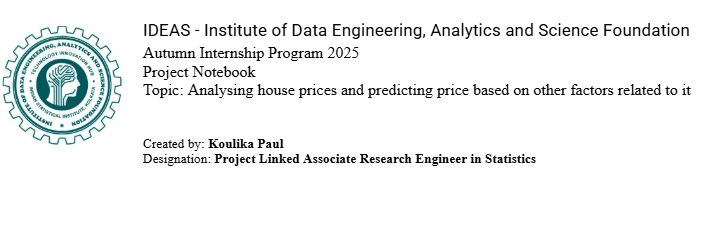

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
house_data= pd.read_csv('/content/house_price_india.csv')
house_data

id   Date  number of bedrooms  number of bathrooms  \
0      6762810145  42491                   5                 2.50   
1      6762810635  42491                   4                 2.50   
2      6762810998  42491                   5                 2.75   
3      6762812605  42491                   4                 2.50   
4      6762812919  42491                   3                 2.00   
...           ...    ...                 ...                  ...   
14615  6762830250  42734                   2                 1.50   
14616  6762830339  42734                   3                 2.00   
14617  6762830618  42734                   2                 1.00   
14618  6762830709  42734                   4                 1.00   
14619  6762831463  42734                   3                 1.00   

       living area  lot area  number of floors  waterfront present  \
0             3650      9050               2.0                   0   
1             2920      4000               1.5                   0   
2             2910      9480               1.5                   0   
3             3310     42998               2.0                   0   
4             2710      4500               1.5                   0   
...            ...       ...               ...                 ...   
14615         1556     20000               1.0                   0   
14616         1680      7000               1.5                   0   
14617         1070      6120               1.0                   0   
14618         1030      6621               1.0                   0   
14619          900      4770               1.0                   0   

       number of views  condition of the house  ...  Built Year  \
0                    4                       5  ...        1921   
1                    0                       5  ...        1909   
2                    0                       3  ...        1939   
3                    0                       3  ...        2001   
4                    0                       4  ...        1929   
...                ...                     ...  ...         ...   
14615                0                       4  ...        1957   
14616                0                       4  ...        1968   
14617                0                       3  ...        1962   
14618                0                       4  ...        1955   
14619                0                       3  ...        1969   

       Renovation Year  Postal Code  Lattitude  Longitude  living_area_renov  \
0                    0       122003    52.8645   -114.557               2880   
1                    0       122004    52.8878   -114.470               2470   
2                    0       122004    52.8852   -114.468               2940   
3                    0       122005    52.9532   -114.321               3350   
4                    0       122006    52.9047   -114.485               2060   
...                ...          ...        ...        ...                ...   
14615                0       122066    52.6191   -114.472               2250   
14616                0       122072    52.5075   -114.393               1540   
14617                0       122056    52.7289   -114.507               1130   
14618                0       122042    52.7157   -114.411               1420   
14619             2009       122018    52.5338   -114.552                900   

       lot_area_renov  Number of schools nearby  Distance from the airport  \
0                5400                         2                         58   
1                4000                         2                         51   
2                6600                         1                         53   
3               42847                         3                         76   
4                4500                         1                         51   
...               ...                       ...                        ...   
14615           17286            

***Insert synthetic missing value***

In [ ]:
house_data_missing= house_data.copy()
## each column missing values are inserted, 20% sample of each column is been drawn and its index is noted to replace those rows with nan
for i in house_data_missing.columns:
  house_data_missing[i].loc[house_data_missing[i].sample(frac=0.2).index]= np.nan
house_data_missing

id     Date  number of bedrooms  number of bathrooms  \
0      6.762810e+09      NaN                 5.0                  2.5   
1      6.762811e+09  42491.0                 NaN                  2.5   
2      6.762811e+09  42491.0                 5.0                  NaN   
3      6.762813e+09      NaN                 4.0                  NaN   
4               NaN  42491.0                 3.0                  2.0   
...             ...      ...                 ...                  ...   
14615  6.762830e+09  42734.0                 2.0                  1.5   
14616           NaN      NaN                 3.0                  2.0   
14617  6.762831e+09      NaN                 2.0                  1.0   
14618  6.762831e+09  42734.0                 4.0                  1.0   
14619  6.762831e+09  42734.0                 3.0                  NaN   

       living area  lot area  number of floors  waterfront present  \
0           3650.0    9050.0               2.0                 0.0   
1           2920.0       NaN               1.5                 0.0   
2              NaN    9480.0               1.5                 NaN   
3           3310.0   42998.0               2.0                 0.0   
4           2710.0    4500.0               NaN                 0.0   
...            ...       ...               ...                 ...   
14615       1556.0   20000.0               1.0                 NaN   
14616       1680.0    7000.0               1.5                 NaN   
14617       1070.0    6120.0               1.0                 0.0   
14618       1030.0    6621.0               NaN                 0.0   
14619        900.0    4770.0               1.0                 0.0   

       number of views  condition of the house  ...  Built Year  \
0                  4.0                     5.0  ...      1921.0   
1                  0.0                     5.0  ...         NaN   
2                  0.0                     3.0  ...      1939.0   
3                  0.0                     3.0  ...      2001.0   
4                  0.0                     4.0  ...      1929.0   
...                ...                     ...  ...         ...   
14615              0.0                     4.0  ...      1957.0   
14616              NaN                     4.0  ...      1968.0   
14617              0.0                     3.0  ...         NaN   
14618              0.0                     4.0  ...      1955.0   
14619              0.0                     NaN  ...      1969.0   

       Renovation Year  Postal Code  Lattitude  Longitude  living_area_renov  \
0                  0.0     122003.0        NaN   -114.557             2880.0   
1                  0.0     122004.0    52.8878   -114.470                NaN   
2                  NaN     122004.0    52.8852   -114.468             2940.0   
3                  0.0     122005.0    52.9532   -114.321                NaN   
4                  0.0     122006.0    52.9047   -114.485                NaN   
...                ...          ...        ...        ...                ...   
14615              0.0     122066.0    52.6191   -114.472                NaN   
14616              0.0     122072.0        NaN        NaN             1540.0   
14617              0.0     122056.0    52.7289   -114.507                NaN   
14618              0.0     122042.0    52.7157   -114.411             1420.0   
14619           2009.0     122018.0    52.5338        NaN                NaN   

       lot_area_renov  Number of schools nearby  Distance from the airport  \
0              5400.0                       2.0                        NaN   
1              4000.0                       2.0                        NaN   
2              6600.0                       1.0                       53.0   
3             42847.0                       3.0                        NaN   
4                 NaN                       1.0                       51.0   
...               ...                       ...                  

**Q1. Try inserting a missing value to a specific column of your choice**

In [ ]:
house_data_missing.isna().sum()

id                                       2924
Date                                     2924
number of bedrooms                       2924
number of bathrooms                      2924
living area                              2924
lot area                                 2924
number of floors                         2924
waterfront present                       2924
number of views                          2924
condition of the house                   2924
grade of the house                       2924
Area of the house(excluding basement)    2924
Area of the basement                     2924
Built Year                               2924
Renovation Year                          2924
Postal Code                              2924
Lattitude                                2924
Longitude                                2924
living_area_renov                        2924
lot_area_renov                           2924
Number of schools nearby                 2924
Distance from the airport                2924
Price                                    2924
dtype: int64

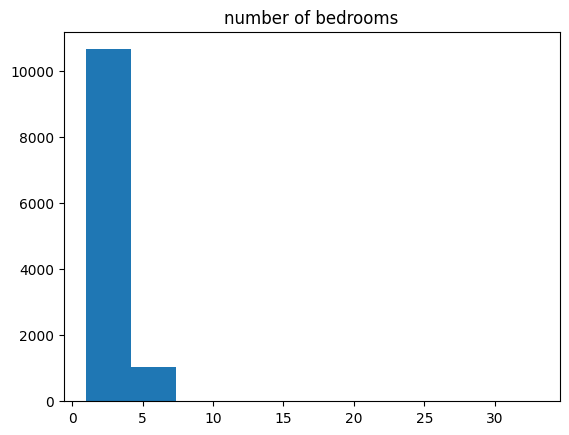

In [ ]:
plt.hist(house_data_missing['number of bedrooms'])
plt.title("number of bedrooms")
plt.show()

***Information about the data***

In [ ]:
house_data_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     11696 non-null  float64
 1   Date                                   11696 non-null  float64
 2   number of bedrooms                     11696 non-null  float64
 3   number of bathrooms                    11696 non-null  float64
 4   living area                            11696 non-null  float64
 5   lot area                               11696 non-null  float64
 6   number of floors                       11696 non-null  float64
 7   waterfront present                     11696 non-null  float64
 8   number of views                        11696 non-null  float64
 9   condition of the house                 11696 non-null  float64
 10  grade of the house                     11696 non-null  float64
 11  Ar

***Dropping columns***

In [ ]:
## Date column wrong input in the data so we drop it and keep inside the actual data
house_data_missing.drop(['Date','Longitude','Renovation Year','Postal Code', 'Lattitude','living_area_renov', 'lot_area_renov'],axis=1,inplace=True)

In [ ]:
house_data_missing.columns

Index(['id', 'number of bedrooms', 'number of bathrooms', 'living area',
       'lot area', 'number of floors', 'waterfront present', 'number of views',
       'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Number of schools nearby', 'Distance from the airport',
       'Price'],
      dtype='object')

**Q2. Show statistics about the data of only numeric columns**

In [ ]:
house_data_missing.describe()

id  number of bedrooms  number of bathrooms   living area  \
count  1.169600e+04        11696.000000         11696.000000  11696.000000   
mean   6.762821e+09            3.377907             2.132716   2099.277018   
std    6.233659e+03            0.942360             0.775076    929.506495   
min    6.762810e+09            1.000000             0.500000    380.000000   
25%    6.762815e+09            3.000000             1.750000   1440.000000   
50%    6.762821e+09            3.000000             2.250000   1930.000000   
75%    6.762826e+09            4.000000             2.500000   2570.000000   
max    6.762832e+09           33.000000             8.000000  12050.000000   

            lot area  number of floors  waterfront present  number of views  \
count   11696.000000      11696.000000        11696.000000     11696.000000   
mean    15026.835499          1.500812            0.007951         0.230934   
std     36709.121897          0.540078            0.088819         0.761586   
min       520.000000          1.000000            0.000000         0.000000   
25%      5040.000000          1.000000            0.000000         0.000000   
50%      7650.000000          1.500000            0.000000         0.000000   
75%     10801.000000          2.000000            0.000000         0.000000   
max    982998.000000          3.500000            1.000000         4.000000   

       condition of the house  grade of the house  \
count            11696.000000        11696.000000   
mean                 3.433140            7.683653   
std                  0.667304            1.176567   
min                  1.000000            4.000000   
25%                  3.000000            7.000000   
50%                  3.000000            7.000000   
75%                  4.000000            8.000000   
max                  5.000000           13.000000   

       Area of the house(excluding basement)  Area of the basement  \
count                           11696.000000          11696.000000   
mean                             1800.432456            296.863372   
std                               829.154109            446.058621   
min                               370.000000              0.000000   
25%                              1200.000000              0.000000   
50%                              1580.000000              0.000000   
75%                              2230.000000            580.000000   
max                              9410.000000           4820.000000   

         Built Year  Number of schools nearby  Distance from the airport  \
count  11696.000000              11696.000000               11696.000000   
mean    1970.994699                  2.012739                  64.896973   
std       29.434298                  0.815891                   8.903160   
min     1900.000000                  1.000000                  50.000000   
25%     1951.000000                  1.000000                  57.000000   
50%     1975.000000                  2.000000                  65.000000   
75%     1997.000000                  3.000000                  73.000000   
max     2015.000000                  3.000000                  80.000000   

              Price  
count  1.169600e+04  
mean   5.393849e+05  
std    3.666244e+05  
min    7.800000e+04  
25%    3.200000e+05  
50%    4.500000e+05  
75%    6.499500e+05  
max    7.700000e+06

***Distribution of price in the dataset***

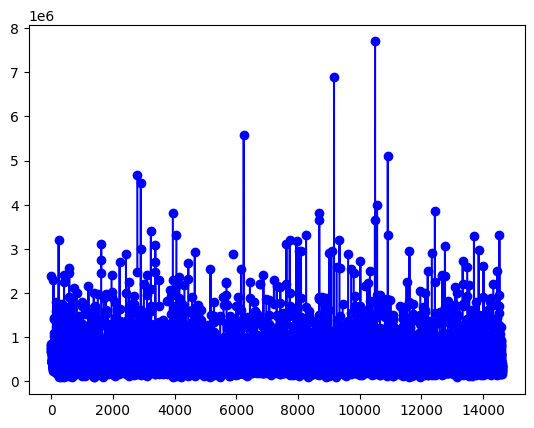

In [ ]:
plt.plot(house_data_missing.index,house_data_missing['Price'],marker='o',linestyle='-',color='b', label="Distribution of Price for all houses")
plt.show()

**Q3. Find the distribution of area (total area) of houses (use Seaborn distplot)**

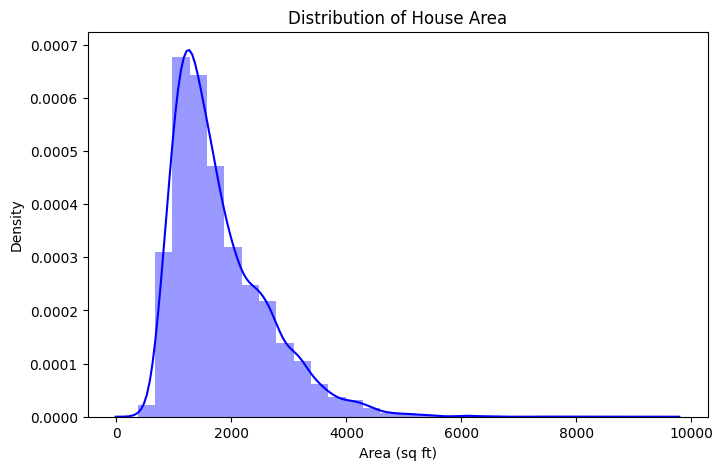

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.distplot(house_data_missing["Area of the house(excluding basement)"], bins=30, kde=True, color='blue')

plt.title("Distribution of House Area")
plt.xlabel("Area (sq ft)")
plt.ylabel("Density")
plt.show()

***Checking for duplicate rows***

In [ ]:
house_data_missing.duplicated().sum()

np.int64(0)

***Checking missing values***

In [ ]:
house_data_missing.isna().sum()

id                                       2924
number of bedrooms                       2924
number of bathrooms                      2924
living area                              2924
lot area                                 2924
number of floors                         2924
waterfront present                       2924
number of views                          2924
condition of the house                   2924
grade of the house                       2924
Area of the house(excluding basement)    2924
Area of the basement                     2924
Built Year                               2924
Number of schools nearby                 2924
Distance from the airport                2924
Price                                    2924
dtype: int64

***Handling missing values***

***Technique 1: Remove missing value rows***

In [ ]:
house_data_missing1= house_data_missing.dropna()
house_data_missing1.isna().sum()

id                                       0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int64

***Technique 2: Replace with mean***

In [ ]:
house_data_missing2= house_data_missing.copy()
for cols in house_data_missing2.columns:
  house_data_missing2[cols]= house_data_missing2[cols].fillna(np.mean(house_data_missing2[cols]))
house_data_missing2.isna().sum()

id                                       0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int64

**Q4. Try replacing the missing values with the standard deviation of each column**

In [ ]:
house_data_missing0= house_data_missing.copy()
for cols in house_data_missing0.columns:
  house_data_missing0[cols]= house_data_missing0[cols].fillna(np.std(house_data_missing0[cols]))
house_data_missing0.isna().sum()

id                                       0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int64

***Technique 3: Interpolation***

In [ ]:

house_data_missing3= house_data_missing.interpolate(method='linear')
house_data_missing2.isna().sum()

id                                       0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int64

**Q5. Try replacing the missing values using interpolation with the polynomial method**

In [ ]:
house_data_missing_poly= house_data_missing.interpolate(method='polynomial',order=2)
house_data_missing_poly.isna().sum()

id                                       0
number of bedrooms                       0
number of bathrooms                      1
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   1
grade of the house                       0
Area of the house(excluding basement)    2
Area of the basement                     0
Built Year                               0
Number of schools nearby                 0
Distance from the airport                2
Price                                    0
dtype: int64

***Technique 4: KNN imputation***

In [ ]:
from sklearn.impute import KNNImputer
imputed_vals= KNNImputer(n_neighbors=5)
imputed_data= pd.DataFrame(imputed_vals.fit_transform(house_data_missing),columns= house_data_missing.columns)
imputed_data.isna().sum()

id                                       0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int64

**Q6. Perform replacing missing values with KNN imputers on scaled data. Also, inverse the scaled data to get the original data.**


In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
numeric_data = house_data_missing.select_dtypes(include=['float64', 'int64'])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)
#knn imputer
imputer = KNNImputer(n_neighbors=5)
imputed_scaled = imputer.fit_transform(scaled_data)

In [ ]:
#inverse transform to original scale
imputed_original = scaler.inverse_transform(imputed_scaled)

# Convert back to DataFrame with same column names
imputed_df = pd.DataFrame(imputed_original, columns=numeric_data.columns)

imputed_df.head()

id  number of bedrooms  number of bathrooms  living area  \
0  6.762810e+09                 5.0                  2.5       3650.0   
1  6.762811e+09                 4.2                  2.5       2920.0   
2  6.762811e+09                 5.0                  2.4       2008.0   
3  6.762813e+09                 4.0                  2.7       3310.0   
4  6.762817e+09                 3.0                  2.0       2710.0   

   lot area  number of floors  waterfront present  number of views  \
0    9050.0               2.0                 0.0              4.0   
1    4633.4               1.5                 0.0              0.0   
2    9480.0               1.5                 0.0              0.0   
3   42998.0               2.0                 0.0              0.0   
4    4500.0               1.5                 0.0              0.0   

   condition of the house  grade of the house  \
0                     5.0                10.0   
1                     5.0                 8.0   
2                     3.0                 8.0   
3                     3.0                 9.0   
4                     4.0                 8.0   

   Area of the house(excluding basement)  Area of the basement  Built Year  \
0                                 3370.0                 280.0      1921.0   
1                                 1910.0                1010.0      1920.2   
2                                 2910.0                   0.0      1939.0   
3                                 3310.0                   0.0      2001.0   
4                                 1826.0                 830.0      1929.0   

   Number of schools nearby  Distance from the airport      Price  
0                       2.0                       63.0  2380000.0  
1                       2.0                       68.0   978500.0  
2                       1.0                       53.0   480799.0  
3                       3.0                       61.4   838000.0  
4                       1.0                       51.0   805000.0

***Changing datatype***

In [ ]:
imputed_data['Number of schools nearby']=house_data_missing['Number of schools nearby'].astype('Int64')

***Find the number of houses having 3 schools nearby***

In [ ]:
imputed_data.groupby('Number of schools nearby')['id'].count()

Number of schools nearby
1    3831
2    3892
3    3973
Name: id, dtype: int64

**Q7. Interpret the above result**

The result shows that the dataset is well balanced across the feature “Number of schools nearby”, with about 3881 houses having 1 school, 3869 with 2 schools, and 3946 with 3 schools nearby. Since the distribution is nearly even, this feature does not introduce bias and can be a reliable input for modeling, potentially helping explain variations in house prices without skewing toward any single category

***Correlation between all the features***

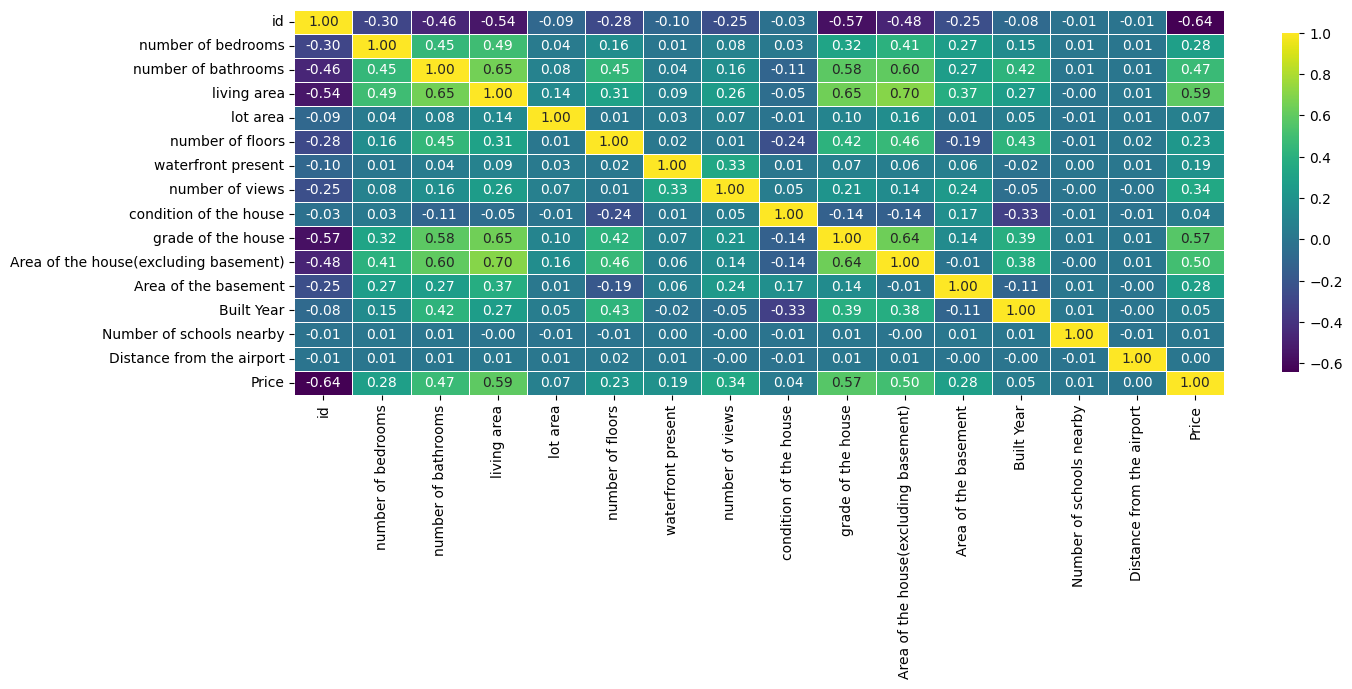

In [ ]:
import seaborn as sns

plt.figure(figsize=(15,5))
sns.heatmap(imputed_data.corr(),annot=True,fmt='0.2f',cmap='viridis',linewidths=0.5,
            cbar_kws={"shrink": 0.88})
plt.show()

**Q8. Find features that are highly correlated with the area of the house (excluding the basement)**

The feature “Area of the house (excluding basement)” shows a strong positive correlation with living area (0.71), indicating that as the living area increases, the main house area also increases significantly. It is also moderately correlated with number of bathrooms (0.56), price (0.52), grade of the house (0.46), and number of bedrooms (0.41). These correlations suggest that larger houses (excluding basements) generally have more bathrooms and bedrooms, are rated higher in grade, and tend to be priced higher.

***Find the distribution of each feature***

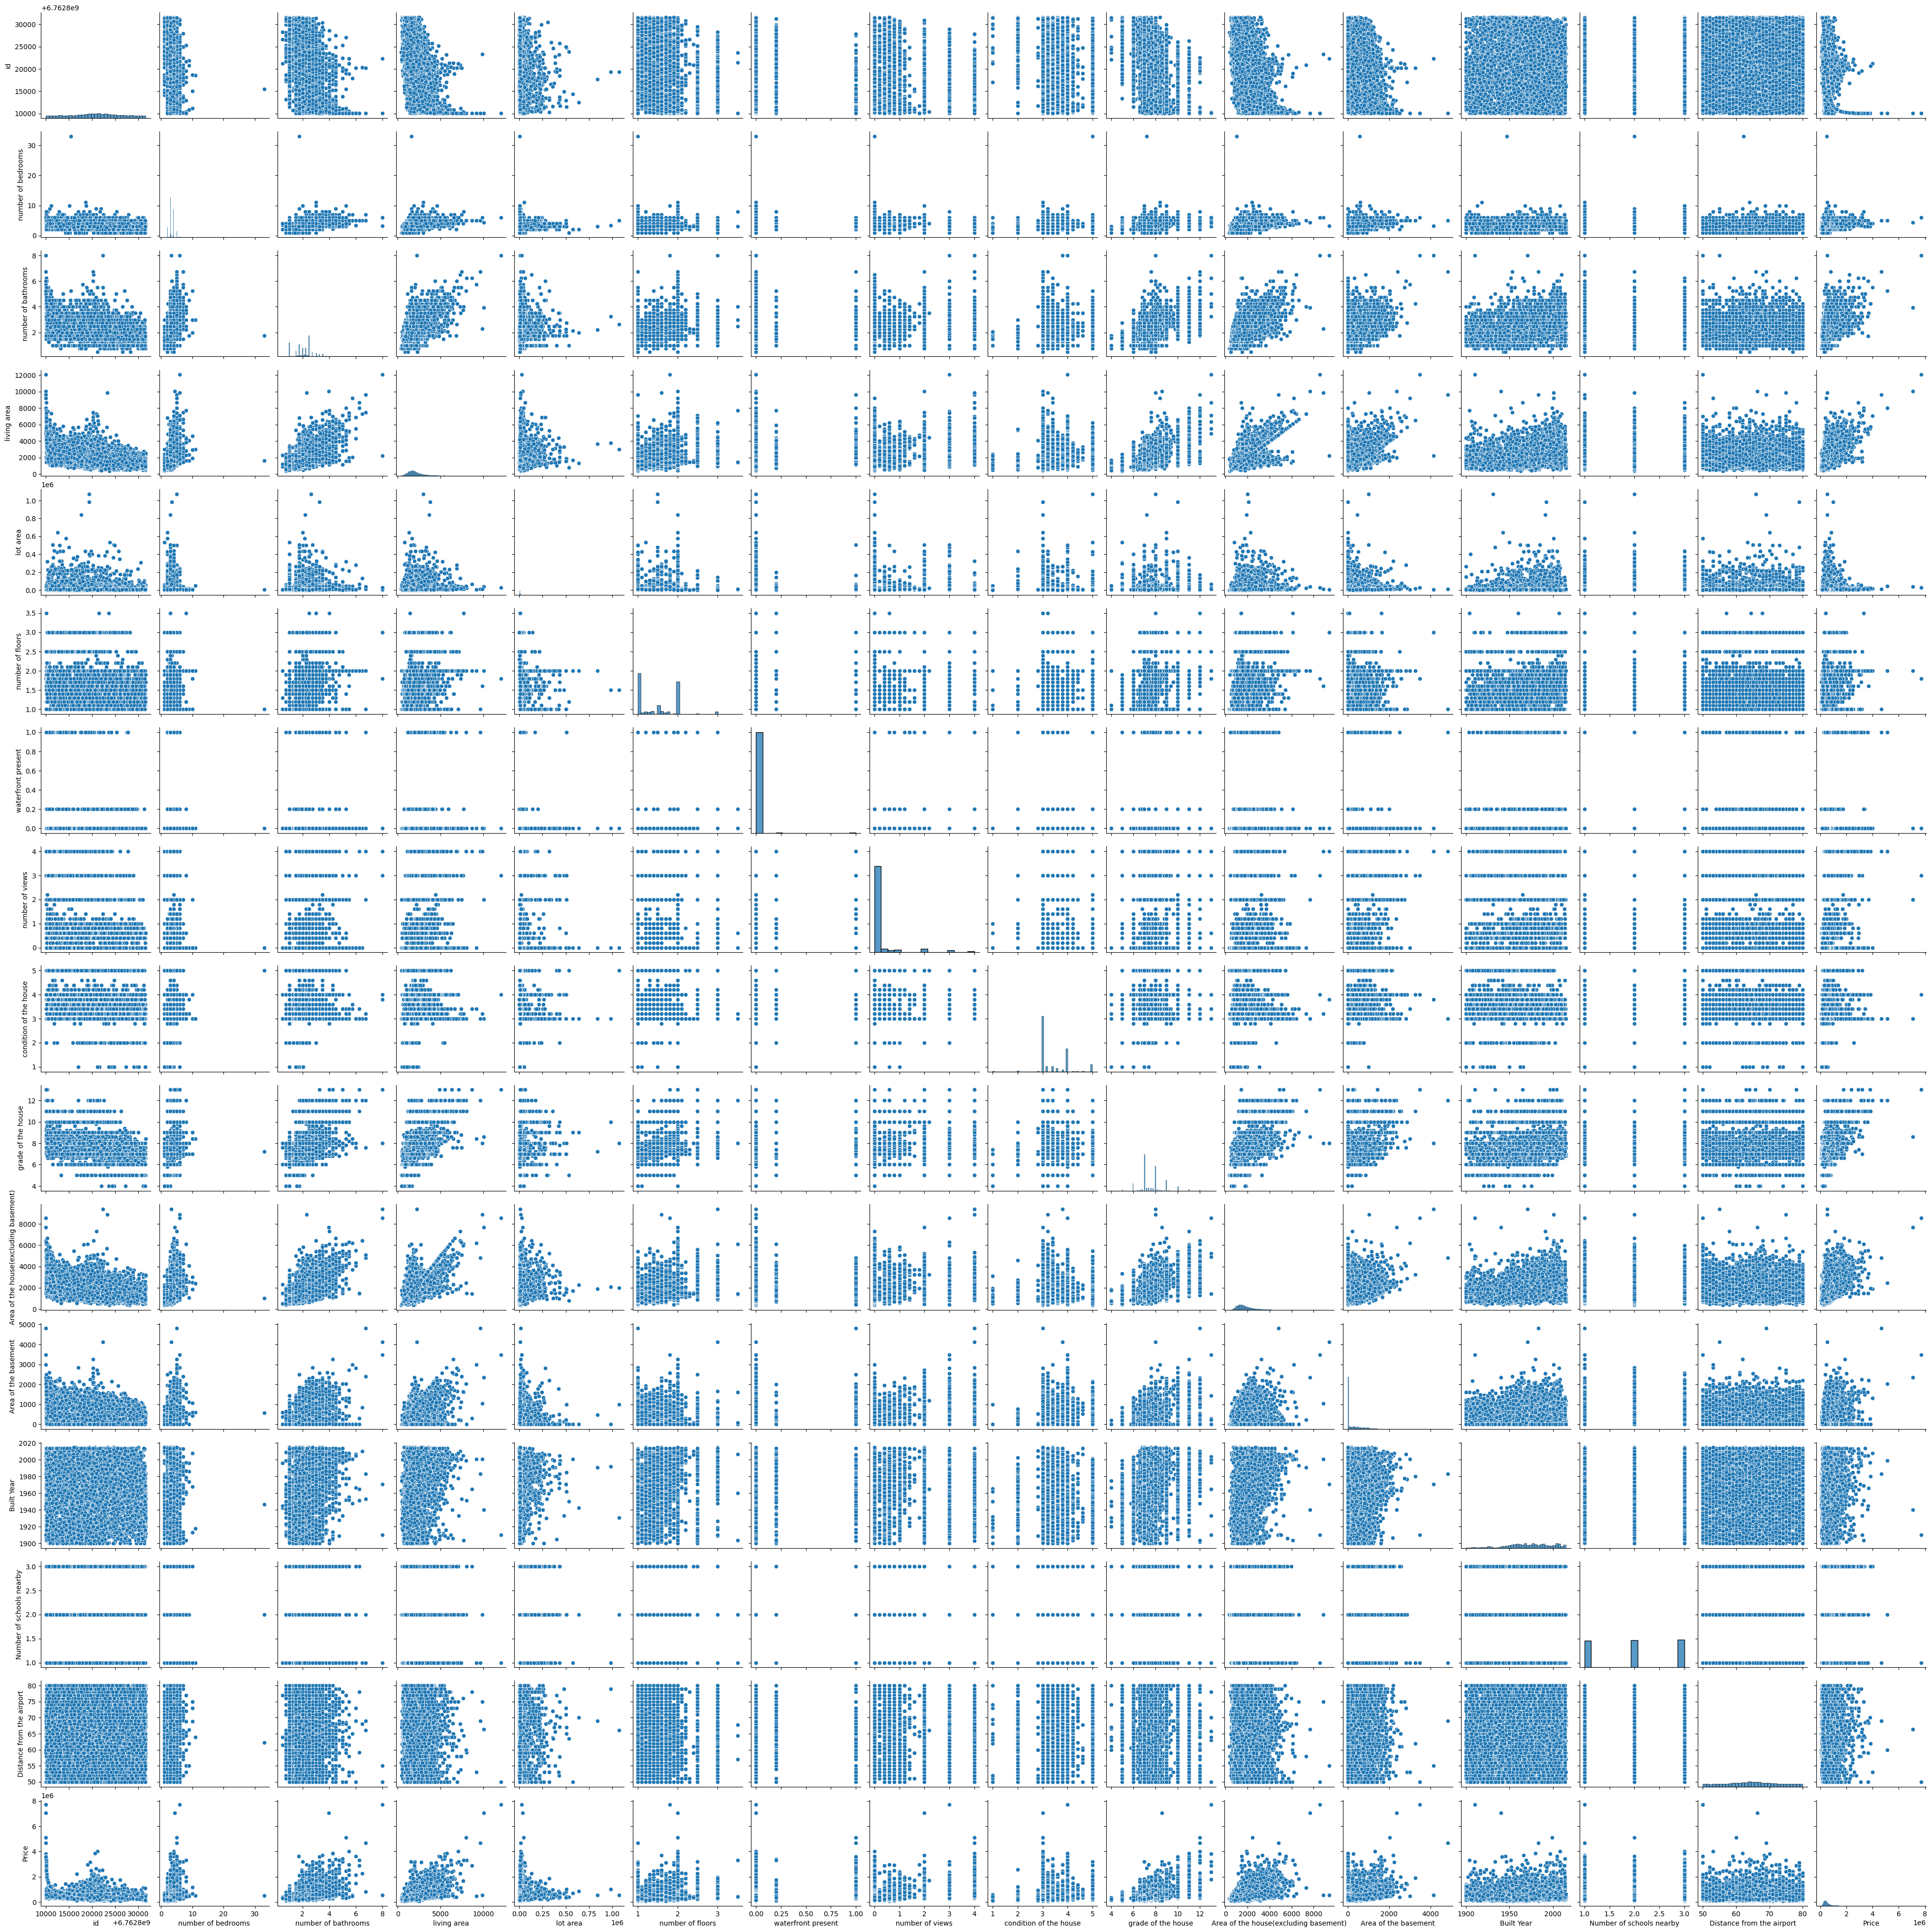

In [ ]:
sns.pairplot(imputed_data)
plt.show()

**Q9. Find the average price of houses having 3 schools nearby**

In [ ]:
imputed_data.groupby('Number of schools nearby')['Price'].agg(np.mean)
## OR
np.mean(imputed_data[imputed_data['Number of schools nearby']==3]['Price'])

np.float64(534030.241228291)

**Q10. Find the average area of houses having 5 bedrooms**

In [ ]:
avg_area = imputed_data[imputed_data['number of bedrooms'] == 5]['Area of the house(excluding basement)'].mean()
print("Average area of houses with 5 bedrooms:", avg_area)

Average area of houses with 5 bedrooms: 2322.4478413068846


***Selecting the features for predicting***

In [ ]:
features=[]
for cols in imputed_data.iloc[:,:-1].columns:
  if (imputed_data['Price'].corr(imputed_data[cols]))>0.50:
    features.append(cols)
print(features)

['living area', 'grade of the house', 'Area of the house(excluding basement)']


In [ ]:
X= imputed_data[features]
X['target']= imputed_data.iloc[:,-1]
y=imputed_data.iloc[:,-1]

In [ ]:
X

living area  grade of the house  Area of the house(excluding basement)  \
0           3650.0                 8.6                                 3370.0   
1           2920.0                 8.0                                 1910.0   
2           2910.0                 8.0                                 1524.0   
3           3310.0                 8.2                                 3310.0   
4           2710.0                 8.0                                 1536.0   
...            ...                 ...                                    ...   
14615       1556.0                 7.0                                 2136.0   
14616       1680.0                 7.0                                 1712.0   
14617       1070.0                 6.0                                 1070.0   
14618       1030.0                 6.0                                 1030.0   
14619        900.0                 6.0                                  900.0   

          target  
0      2380000.0  
1      1400000.0  
2      1200000.0  
3       838000.0  
4       805000.0  
...          ...  
14615   221700.0  
14616   219200.0  
14617   209000.0  
14618   379888.0  
14619   146000.0  

[14620 rows x 4 columns]

In [ ]:
y

0        2380000.0
1        1400000.0
2        1200000.0
3         838000.0
4         805000.0
           ...    
14615     221700.0
14616     219200.0
14617     209000.0
14618     379888.0
14619     146000.0
Name: Price, Length: 14620, dtype: float64

**Q11. Show the pairwise distribution of X and y**

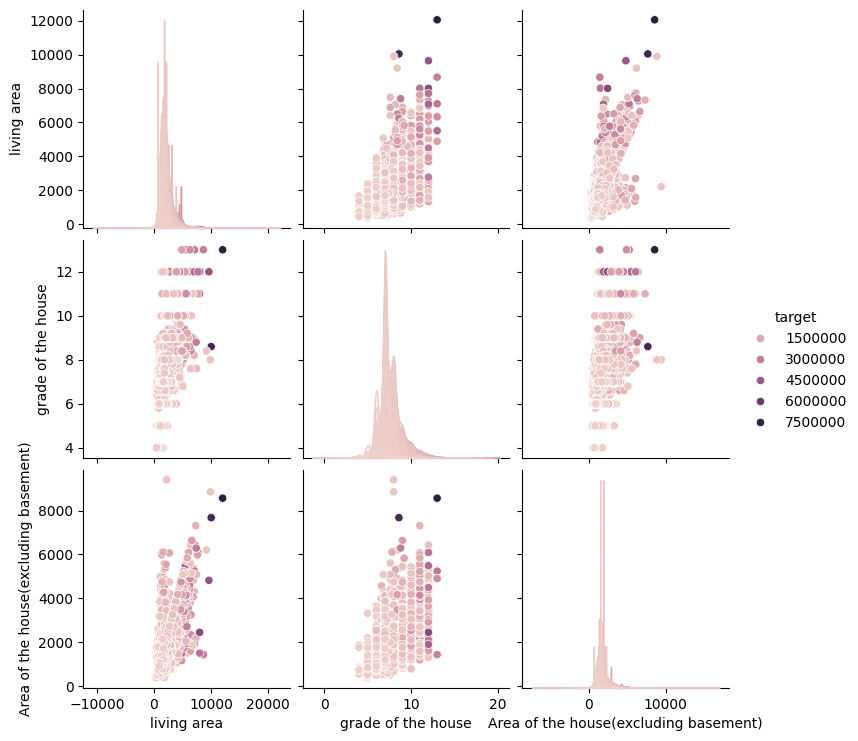

In [ ]:
# pairplot
sns.pairplot(X, hue="target", diag_kind="kde")

***Splitting datasets into training and testing***

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=123)

**Q12. Split the data as 60% training and 40% testing**

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.4,random_state=123)

***Fitting the linear regression model and predicting***

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score

In [ ]:
LR= LinearRegression()
LR_model= LR.fit(X_train,y_train)
y_pred= LR_model.predict(X_test)

***Evaluation***

In [ ]:
MSE= mean_squared_error(y_test,y_pred)
R_square= r2_score(y_test,y_pred)

In [ ]:
print(MSE)
print("==============")
print(R_square)

3.8046270721316716e-20
1.0


**Q13. Try model building and predicting with some other dataset of your choice**

**For house_price_regression_dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
house_data1= pd.read_csv('/content/house_price_regression_dataset.csv')
house_data1

Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_Built  Lot_Size  \
0              1360             2              1        1981  0.599637   
1              4272             3              3        2016  4.753014   
2              3592             1              2        2016  3.634823   
3               966             1              2        1977  2.730667   
4              4926             2              1        1993  4.699073   
..              ...           ...            ...         ...       ...   
995            3261             4              1        1978  2.165110   
996            3179             1              2        1999  2.977123   
997            2606             4              2        1962  4.055067   
998            4723             5              2        1950  1.930921   
999            3268             4              2        1983  3.108790   

     Garage_Size  Neighborhood_Quality   House_Price  
0              0                     5  2.623829e+05  
1              1                     6  9.852609e+05  
2              0                     9  7.779774e+05  
3              1                     8  2.296989e+05  
4              0                     8  1.041741e+06  
..           ...                   ...           ...  
995            2                    10  7.014940e+05  
996            1                    10  6.837232e+05  
997            0                     2  5.720240e+05  
998            0                     7  9.648653e+05  
999            2                     2  7.425993e+05  

[1000 rows x 8 columns]

In [ ]:
house_data_missing= house_data1.copy()
## each column missing values are inserted, 20% sample of each column is been drawn and its index is noted to replace those rows with nan
for i in house_data_missing.columns:
  house_data_missing[i].loc[house_data_missing[i].sample(frac=0.2).index]= np.nan
house_data_missing

Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_Built  Lot_Size  \
0            1360.0           2.0            1.0      1981.0  0.599637   
1               NaN           3.0            3.0      2016.0  4.753014   
2            3592.0           1.0            2.0      2016.0  3.634823   
3             966.0           NaN            2.0      1977.0  2.730667   
4            4926.0           2.0            NaN         NaN  4.699073   
..              ...           ...            ...         ...       ...   
995          3261.0           4.0            1.0      1978.0  2.165110   
996             NaN           1.0            2.0      1999.0  2.977123   
997             NaN           NaN            NaN      1962.0  4.055067   
998             NaN           5.0            2.0         NaN  1.930921   
999          3268.0           4.0            2.0      1983.0  3.108790   

     Garage_Size  Neighborhood_Quality    House_Price  
0            0.0                   5.0  262382.852274  
1            1.0                   NaN            NaN  
2            NaN                   NaN  777977.390119  
3            1.0                   8.0  229698.918664  
4            NaN                   NaN            NaN  
..           ...                   ...            ...  
995          2.0                  10.0  701493.997069  
996          1.0                  10.0  683723.160704  
997          0.0                   2.0  572024.023634  
998          0.0                   7.0  964865.298639  
999          2.0                   NaN  742599.253332  

[1000 rows x 8 columns]

Q1. Try inserting a missing value to a specific column of your choice

In [ ]:
house_data_missing.isna().sum()

Square_Footage          200
Num_Bedrooms            200
Num_Bathrooms           200
Year_Built              200
Lot_Size                200
Garage_Size             200
Neighborhood_Quality    200
House_Price             200
dtype: int64

Information about data

In [ ]:
house_data_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        800 non-null    float64
 1   Num_Bedrooms          800 non-null    float64
 2   Num_Bathrooms         800 non-null    float64
 3   Year_Built            800 non-null    float64
 4   Lot_Size              800 non-null    float64
 5   Garage_Size           800 non-null    float64
 6   Neighborhood_Quality  800 non-null    float64
 7   House_Price           800 non-null    float64
dtypes: float64(8)
memory usage: 62.6 KB


Q2. Show statistics about the data of only numeric columns

In [ ]:
house_data_missing.describe()

Square_Footage  Num_Bedrooms  Num_Bathrooms   Year_Built    Lot_Size  \
count      800.000000    800.000000     800.000000   800.000000  800.000000   
mean      2805.727500      3.003750       1.985000  1986.467500    2.823904   
std       1252.728713      1.421711       0.812773    20.821524    1.293470   
min        503.000000      1.000000       1.000000  1950.000000    0.522619   
25%       1743.000000      2.000000       1.000000  1968.000000    1.728581   
50%       2842.500000      3.000000       2.000000  1986.000000    2.856088   
75%       3842.250000      4.000000       3.000000  2005.000000    3.959186   
max       4999.000000      5.000000       3.000000  2022.000000    4.984545   

       Garage_Size  Neighborhood_Quality   House_Price  
count   800.000000            800.000000  8.000000e+02  
mean      1.041250              5.671250  6.170072e+05  
std       0.817241              2.900636  2.514890e+05  
min       0.000000              1.000000  1.116269e+05  
25%       0.000000              3.000000  4.023009e+05  
50%       1.000000              6.000000  6.252366e+05  
75%       2.000000              8.000000  8.272621e+05  
max       2.000000             10.000000  1.107045e+06

Distribution of house price in the dataset

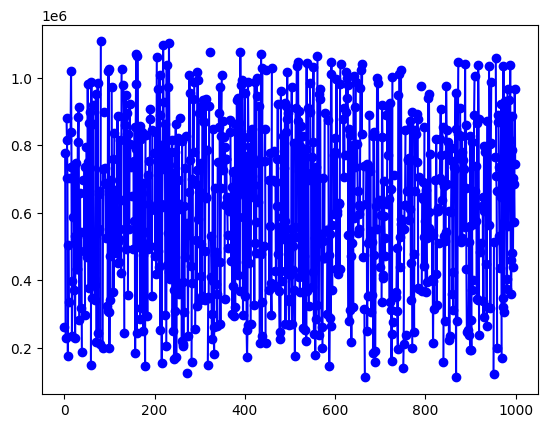

In [ ]:
plt.plot(house_data_missing.index,house_data_missing['House_Price'],marker='o',linestyle='-',color='b', label="Distribution of house Price for all houses")
plt.show()

Q3. Find the distribution of area (Square Footage) of houses (use Seaborn distplot)

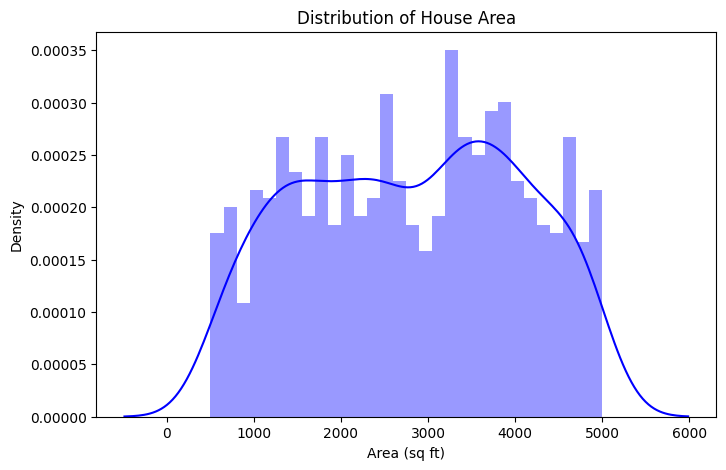

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.distplot(house_data_missing["Square_Footage"], bins=30, kde=True, color='blue')

plt.title("Distribution of House Area")
plt.xlabel("Area (sq ft)")
plt.ylabel("Density")
plt.show()

Checking duplicate rows

In [ ]:
house_data_missing.duplicated().sum()

np.int64(0)

Checking missing values

In [ ]:
house_data_missing.isna().sum()

Square_Footage          200
Num_Bedrooms            200
Num_Bathrooms           200
Year_Built              200
Lot_Size                200
Garage_Size             200
Neighborhood_Quality    200
House_Price             200
dtype: int64

Handling missing values

In [ ]:
#replace with mean
house_data_missing1= house_data_missing.copy()
for cols in house_data_missing1.columns:
  house_data_missing1[cols]= house_data_missing1[cols].fillna(np.mean(house_data_missing1[cols]))
house_data_missing1.isna().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

Q4. Try replacing the missing values with the standard deviation of each column

In [ ]:
house_data_missing0= house_data_missing.copy()
for cols in house_data_missing0.columns:
  house_data_missing0[cols]= house_data_missing0[cols].fillna(np.std(house_data_missing0[cols]))
house_data_missing0.isna().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

Q5. Try replacing the missing values using interpolation with the polynomial method

In [ ]:
house_data_missing_poly= house_data_missing.interpolate(method='polynomial',order=2)
house_data_missing_poly.isna().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    1
House_Price             0
dtype: int64

Q6. Perform replacing missing values with KNN imputers on scaled data. Also, inverse the scaled data to get the original data.

In [ ]:
from sklearn.impute import KNNImputer
imputed_vals= KNNImputer(n_neighbors=5)
imputed_data= pd.DataFrame(imputed_vals.fit_transform(house_data_missing),columns= house_data_missing.columns)
imputed_data.isna().sum()
from sklearn.preprocessing import StandardScaler
numeric_data = house_data_missing.select_dtypes(include=['float64', 'int64'])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)
#knn imputer
imputer = KNNImputer(n_neighbors=5)
imputed_scaled = imputer.fit_transform(scaled_data)

In [ ]:
#inverse transform to original scale
imputed_original = scaler.inverse_transform(imputed_scaled)

# Convert back to DataFrame with same column names
imputed_df = pd.DataFrame(imputed_original, columns=numeric_data.columns)

imputed_df.head()

Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_Built  Lot_Size  \
0          1360.0           2.0            1.0      1981.0  0.599637   
1          3375.0           3.0            3.0      2016.0  4.753014   
2          3592.0           1.0            2.0      2016.0  3.634823   
3           966.0           3.0            2.0      1977.0  2.730667   
4          4926.0           2.0            1.4      1987.0  4.699073   

   Garage_Size  Neighborhood_Quality    House_Price  
0          0.0                   5.0  262382.852274  
1          1.0                   6.8  743577.080756  
2          0.8                   6.2  777977.390119  
3          1.0                   8.0  229698.918664  
4          0.8                   7.6  551418.200309

Correlation between features

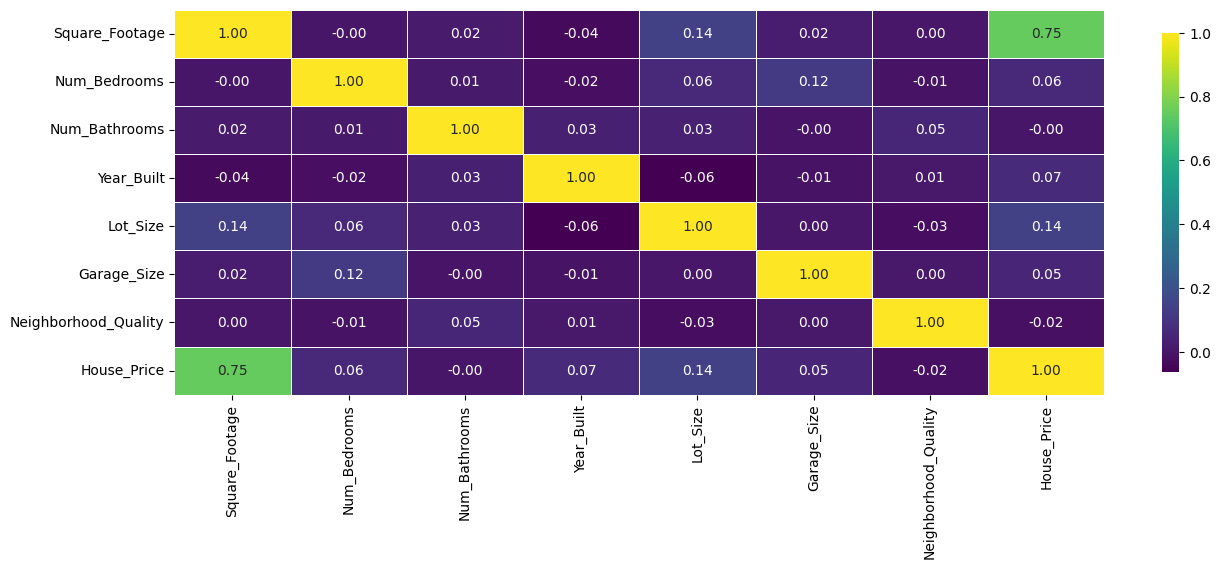

In [ ]:
import seaborn as sns

plt.figure(figsize=(15,5))
sns.heatmap(imputed_data.corr(),annot=True,fmt='0.2f',cmap='viridis',linewidths=0.5,
            cbar_kws={"shrink": 0.88})
plt.show()

Q8. Find features that are highly correlated

Square_Footage and House_Price have the highest positive correlation with a value of 0.75. This means larger houses (more living area) strongly tend to have higher prices.

Find the distribution of features

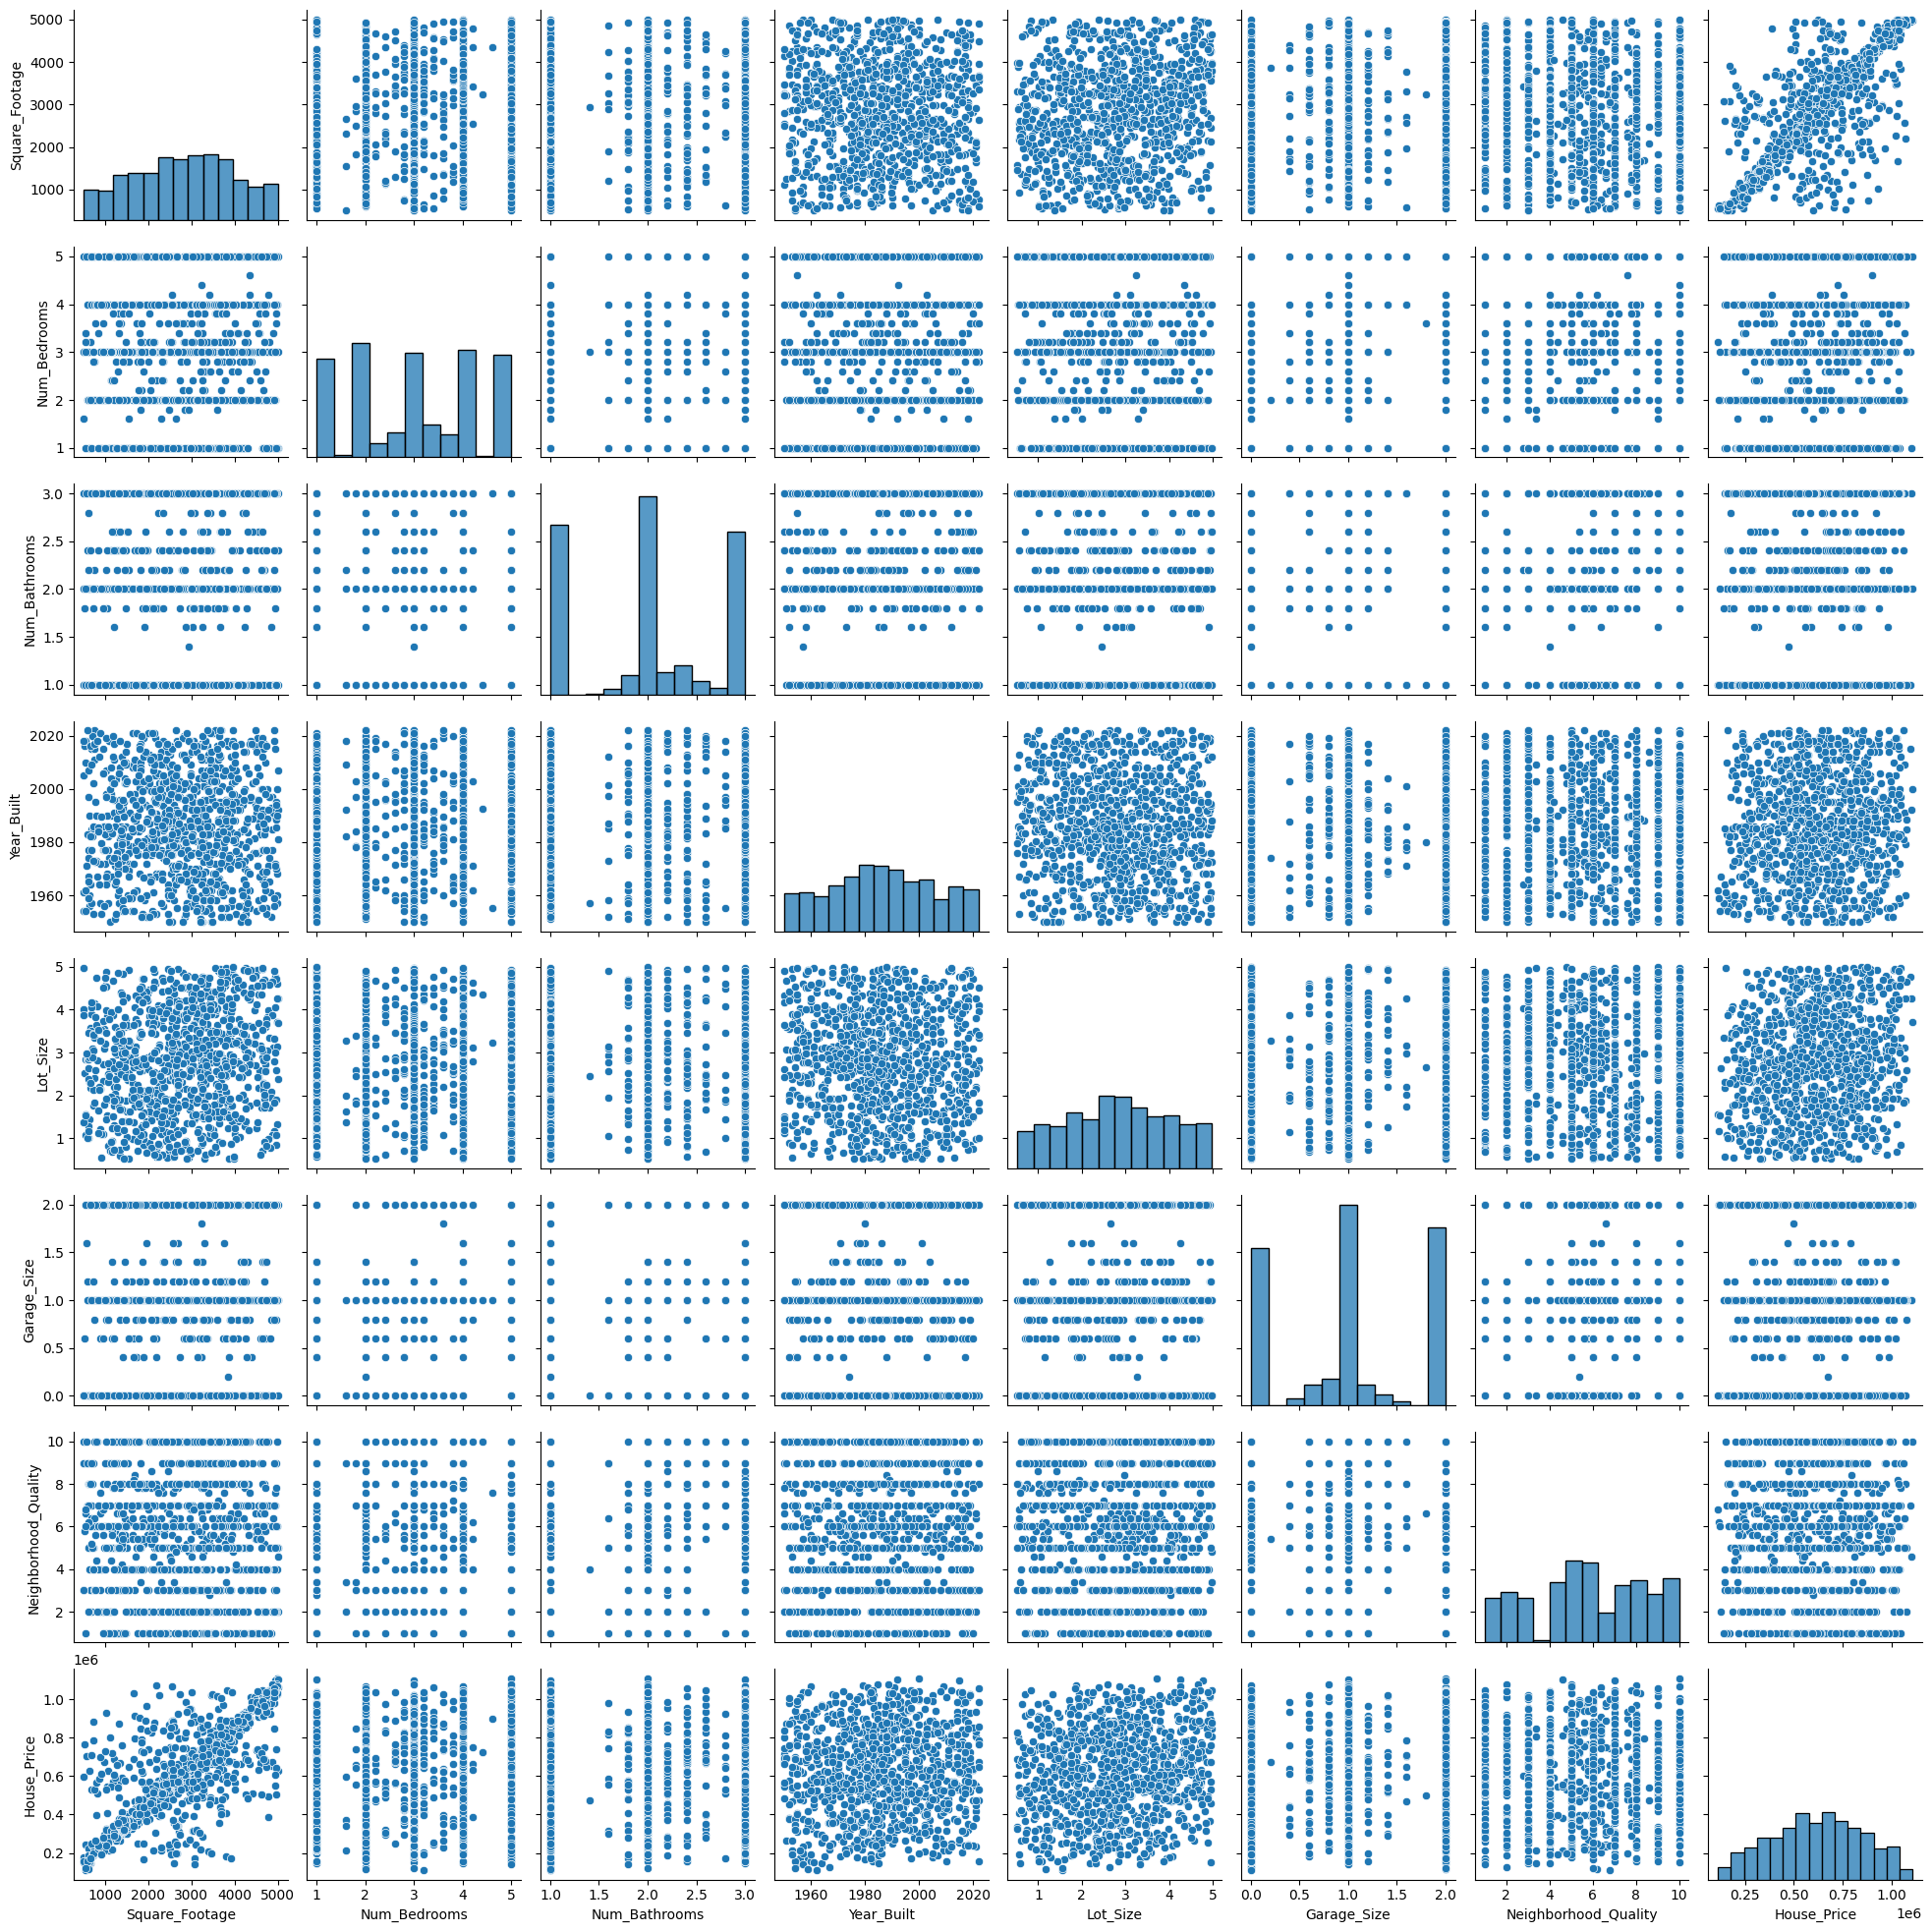

In [ ]:
sns.pairplot(imputed_data)
plt.show()

Split the data

In [ ]:
x=imputed_data.drop(['House_Price'],axis=1)
y=imputed_data['House_Price']

Q11. Show the pairwise distribution of X and y

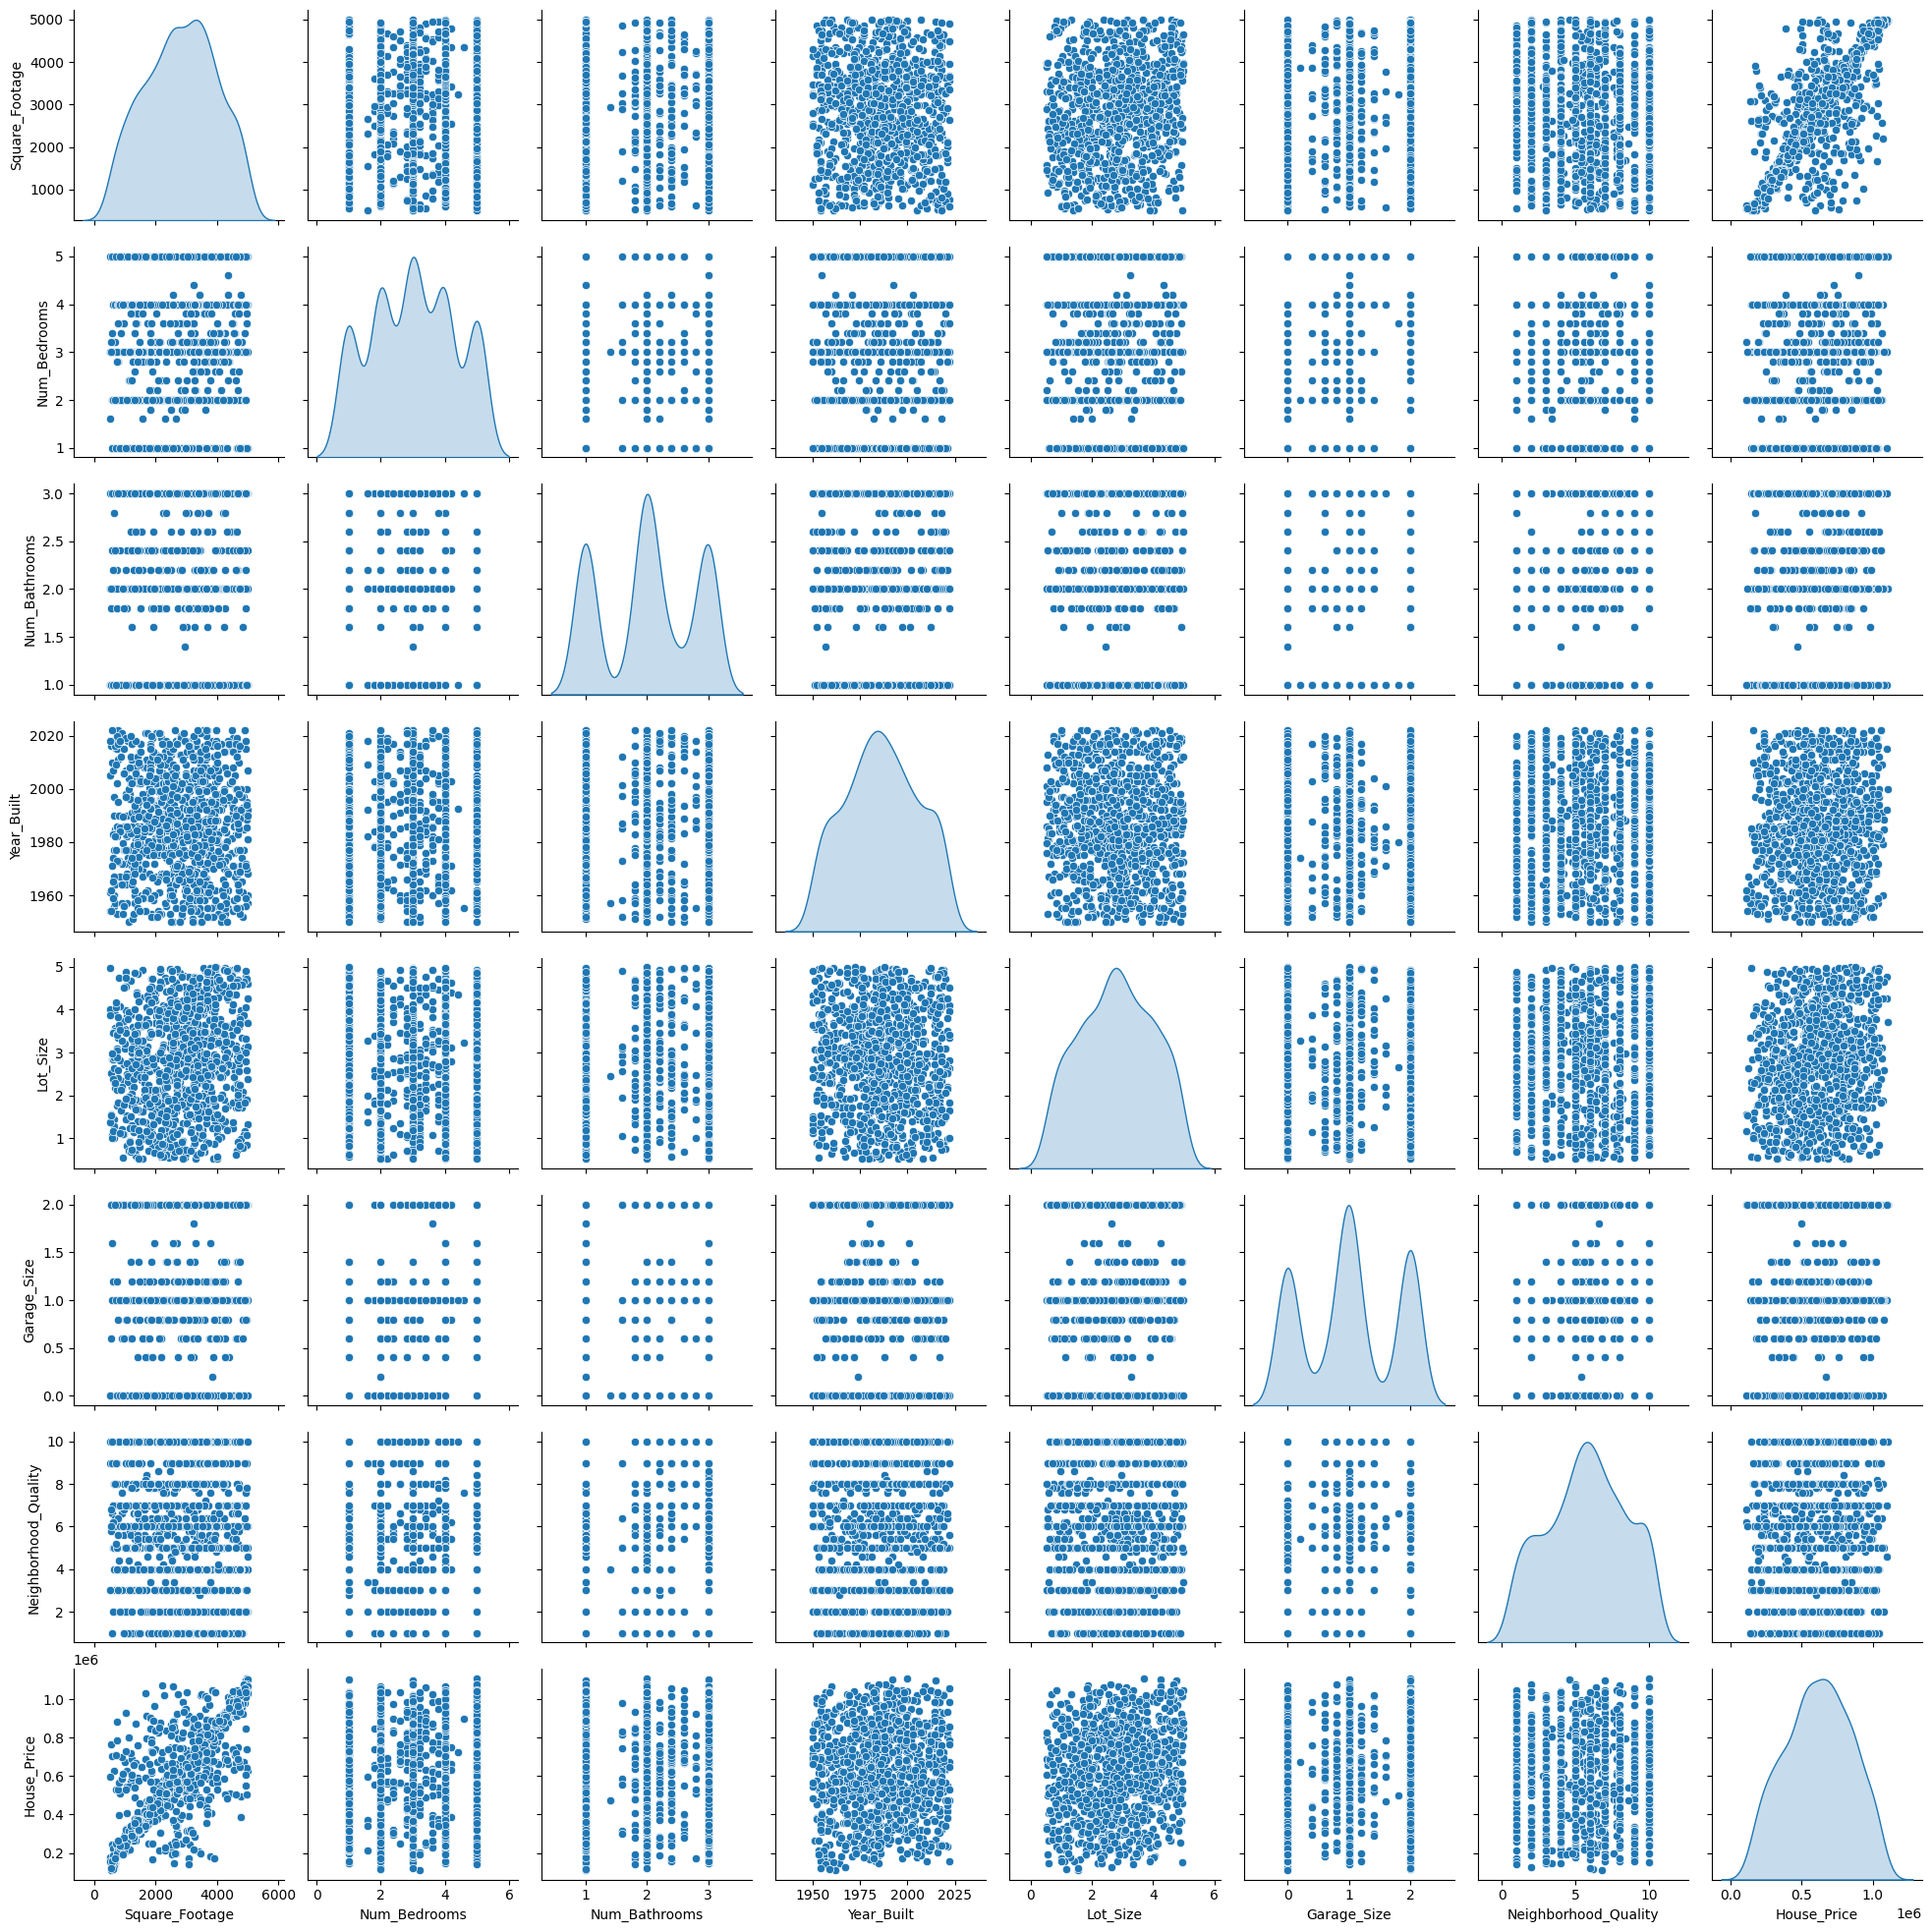

In [ ]:
df_xy = x.copy()
df_xy['House_Price'] = y

# Pairplot
sns.pairplot(df_xy, diag_kind="kde")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=123)

Q12. Split the data as 60% training and 40% testing

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.4,random_state=123)

Fitting the linear regression model and predicting

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score
LR= LinearRegression()
LR_model= LR.fit(x_train,y_train)
y_pred= LR_model.predict(x_test)

In [ ]:
MSE= mean_squared_error(y_test,y_pred)
print("MSE",MSE)
R_square= r2_score(y_test,y_pred)
print("R_square",R_square)

MSE 24454931472.942158
R_square 0.5341641732859195
